# **Resolución de las incongruencias entre la valoración y las reseñas de un producto**
*Por: Jorge Bahamonde (20980332-1) y Bruno Henríquez (21029655-7)*

En un mundo donde las decisiones de compra están cada vez más influenciadas por el entorno digital, las reseñas y valoraciones de productos se han convertido en elementos clave para los consumidores. Según el estudio Trust in Ad de Nielsen en 2021, las reviews superan en confianza a otros medios como anuncios en línea, mensajes de texto, y estrategias SEO, siendo preferidas por un 50% más de personas. Este fenómeno se refuerza con los datos proporcionados por Reputation en octubre de este año, donde un 54% de los consumidores coloca las reseñas online como su principal fuente de confianza, incluso por encima de las recomendaciones de conocidos (24%) y declaraciones empresariales (18%).

La relevancia de estas reseñas es aún mayor entre la generación Z, donde el 76% las considera el segundo factor más importante al decidir una compra, solo superadas por la calidad del producto. Esto destaca no solo la influencia de las opiniones, sino también la necesidad de que exista congruencia entre las reseñas y las valoraciones otorgadas, dado el impacto directo que tienen en la confianza del consumidor y en la decisión de compra. Estudios como Relacionamiento y clasificación de comentarios de productos de Amazon respaldan esta importancia, subrayando cómo la alineación entre estos factores puede determinar el éxito o el fracaso de un producto en el mercado.

Por consiguiente, como equipo decidimos tomar en cuenta la relevancia de las reseñas y las valoraciones para así abordar la siguiente problemática: resolución de las incongruencias entre la valoración y las reseñas de un producto.

Lo primero que se realizó fue importar la base de datos con la cual se estuvo trabajando.

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

mydata= pd.read_csv('/content/drive/MyDrive/iris_df.csv')
mydata.head()

Mounted at /content/drive


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Para trabajar la base de datos seleccionada, se tuvo que importar las librerías necesarias para esto, además de instalar bibliotecas fundamentales para las tareas de análisis de texto y procesamiento del lenguaje natural (PNL).

In [ ]:
!pip install nltk
!pip install textblob
!pip install wordcloud

from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
En esta línea de código se eliminaron las columnas que no eran necesarias para el análisis, por lo que entorpecían en el modelo.

In [ ]:
mydata=mydata.drop(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator','Time'], axis=1)
mydata.head()

,Id,Score,Summary,Text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,5,Great taffy,Great taffy at a great price. There was a wid...


En la siguiente línea de código se buscan valores faltantes en la base de datos, en este caso no se encontró ninguno.

In [ ]:
print(mydata.describe())

print('**Missing values check**')
print(mydata.isnull().sum())

             Id     Score
count 568454.00 568454.00
mean  284227.50      4.18
std   164098.68      1.31
min        1.00      1.00
25%   142114.25      4.00
50%   284227.50      5.00
75%   426340.75      5.00
max   568454.00      5.00
**Missing values check**
Id         0
Score      0
Summary    0
Text       0
dtype: int64


In [ ]:
df = mydata.copy()

Siguiendo con el procesamiento de los datos, el siguiente código busca que las mayúsculas y las minúsculas no sean consideradas diferentes. Por ejemplo, las palabras "Good" y "good" serían consideradas la misma palabra. Además, se eliminan caracteres que no son de utilidad, como los números.

In [ ]:
# Normalizing Case Folding
df['Text'] = df['Text'].str.lower()

# Punctuations
df['Text'] = df['Text'].str.replace('[^\w\s]', '')

# regular expression
# Numbers
df['Text'] = df['Text'].str.replace('\d', '')

Aquí se importa una librería para, porteriormente, eliminar las palabras que no son relevantes para el análisis. Las denominadas "stopwords" son palabras comunes en el idioma inglés, tales como "the", "a", "an", "are", entre otros.

In [ ]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')

sw = stopwords.words('english')

df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


En contra parte, el siguiente código elimina palabras que no son comunes en las reseñas, es decir, palabras que aparecen una vez.

In [ ]:
# Rarewords
temp_df = pd.Series(' '.join(df['Text']).split()).value_counts()

drops = temp_df[temp_df <= 1]

df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

Ahora, se prosigue con la lematización de las palabras. Este es un proceso que busca acortar las palabras en su forma base. Por ejemplo, si tenemos las palabras: "casas", "casita" y "casero", la raíz de cada una de estas palabras sería "casa", por lo tanto, se transforman estas palabras por su forma base (raíz).

In [ ]:
!pip install textblob
import nltk
from textblob import Word

nltk.download('wordnet')

# Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


Aca se eliminan los datos duplicados, por ende se redujeron los datos con los que se iban a trabajar.

In [ ]:
df.drop_duplicates(subset=['Text'], keep='first', inplace=True)

In [ ]:
print(df.describe())

print('**Missing values check**')
print(df.isnull().sum())

             Id     Score
count 393124.00 393124.00
mean  261225.95      4.18
std   167030.23      1.31
min        1.00      1.00
25%   112460.75      4.00
50%   248630.50      5.00
75%   407058.25      5.00
max   568454.00      5.00
**Missing values check**
Id         0
Score      0
Summary    0
Text       0
dtype: int64


In [ ]:
df["Text"].head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanut ac...
2,"confection around centuries. light, pillowy ci..."
3,looking secret ingredient robitussin believe f...
4,great taffy great price. wide assortment yummy...


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df["Text"][0:10].apply(lambda x: sia.polarity_scores(x))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Text
0,"{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp..."
1,"{'neg': 0.142, 'neu': 0.737, 'pos': 0.121, 'co..."
2,"{'neg': 0.132, 'neu': 0.576, 'pos': 0.292, 'co..."
3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"{'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp..."
5,"{'neg': 0.044, 'neu': 0.714, 'pos': 0.242, 'co..."
6,"{'neg': 0.0, 'neu': 0.54, 'pos': 0.46, 'compou..."
7,"{'neg': 0.0, 'neu': 0.311, 'pos': 0.689, 'comp..."
8,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp..."
9,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp..."


Esta línea de código es una de las más importantes. Este toma todas las reseñas y a cada palabra le asigna un número en un rango [-1,1], donde -1 corresponde a una palabra de sentimiento negativo y 1 de sentimiento positivo. Al final, se realiza un promedio tomando los puntajes de cada palabra de las reseñas y el resultado arroja el sentimiento final de la reseña.

In [ ]:
df["Text"][0:393124].apply(lambda x: sia.polarity_scores(x)["compound"])

,Text
0,0.94
1,-0.10
2,0.86
3,0.00
4,0.95
...,...
568449,0.93
568450,-0.62
568451,0.83
568452,0.97


Aquí se trata de simplificar la lectura de los datos. Los promedios de las reseñas que sean mayores a 0 serán reemplazadas por un 1. En caso contrario, las reseñas con un resultado menor a 0 serán reemplazados por un 0. Las reseñas con un 1 son consideradas una reseña positiva y las reseñas con un 0 son consideradas reseñas negativas.

In [ ]:
df["Text"][0:393124].apply(lambda x: "1" if sia.polarity_scores(x)["compound"] > 0 else "0")

,Text
0,1
1,0
2,1
3,0
4,1
...,...
568449,1
568450,0
568451,1
568452,1


In [ ]:
pol_ = pd.concat([df["Text"][0:393124], df["Text"][0:393124].apply(lambda x: "1" if sia.polarity_scores(x)["compound"] > 0 else "0")], axis=1)
pol_.columns = ["Text", "Sentiment"]
pol_

,Text,Sentiment
0,bought several vitality canned dog food produc...,1
1,product arrived labeled jumbo salted peanut ac...,0
2,"confection around centuries. light, pillowy ci...",1
3,looking secret ingredient robitussin believe f...,0
4,great taffy great price. wide assortment yummy...,1
...,...,...
568449,great sesame good better resturants eaten husb...,1
568450,i'm disappointed flavor. chocolate note especi...,0
568451,"star small, give 10-15 one training session. t...",1
568452,best treat training rewarding dog good groomin...,1


Acá se lleva a cabo un recuento de cuantas reseñas son consideradas positivas y cuantas negativas.

In [ ]:
df["Sentiment_label"] = df["Text"].apply(lambda x: "1" if sia.polarity_scores(x)["compound"] > 0 else "0")
df["Sentiment_label"].value_counts()

,count
Sentiment_label,
1,357573
0,35551


In [ ]:
df["Sentiment_label"] = LabelEncoder().fit_transform(df["Sentiment_label"])

In [ ]:
y = df["Sentiment_label"]
X = df["Text"]

En esta línea de código se crea una copia de la base de datos bajo el nombre de "df_prep", únicamente con las columnas "Preproccesed Review" (reseñas) y "Target" (sentimiento de la reseña).

In [ ]:
data_dict = {
    "Preprocessed Review": df['Text'],
    "Target": df['Sentiment_label']
}

df_prep = pd.DataFrame(data_dict)
df_prep.head()

,Preprocessed Review,Target
0,bought several vitality canned dog food produc...,1
1,product arrived labeled jumbo salted peanut ac...,0
2,"confection around centuries. light, pillowy ci...",1
3,looking secret ingredient robitussin believe f...,0
4,great taffy great price. wide assortment yummy...,1


Para preparar los datos de texto para el modelado de Machine Learning, se utiliza la técnica TF-IDF. TF-IDF son las siglas de Term Frequency-Inverse Document Frequency. Esta es una técnica numérica que se utiliza en el PNL para reflejar la importancia de una palabra en un documento en relación con una colección de documentos (corpus). TF-IDF mide la relevancia de una palabra basándose en dos ideas principales: Frecuencia del término (TF), la cual mide la frecuencia con la que una palabra aparece en un documento, y Frecuencia Inversa del Documento (IDF) la que mide la rareza de una palabra en todo el documento (en nuestro caso, reseña). Esta técnica es útil debido a que convierte texto en una representación numérica que los modelos de Machine Learning pueden entender, identifica palabras claves y reduce el ruido al “penalizar” palabras comunes (IDF bajo), así enfocándose en palabras más relevantes
Así, se transforman las reseñas en una representación numérica a través de TF-IDF. “X” contiene las características (las reseñas transformadas) e “y” contiene el sentimiento que se quiere predecir.


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer()
transformer = TfidfTransformer(norm='l2', sublinear_tf=True)
counts = count_vect.fit_transform(df_prep['Preprocessed Review'])

X = transformer.fit_transform(counts)
y = np.array(df_prep['Target'].values, dtype='float64')

Para efectos de implementar la regresión logística, se estimó conveniente dividir la base de datos en un 80% para entrenamiento del modelo y el 20% restante para el posterior testeo de este.

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((314499, 62860), (78625, 62860), (314499,), (78625,))

In [ ]:
LABELS = ['Negative', 'Positive']

In [ ]:
%%time
logreg = LogisticRegression(random_state=42, solver="saga")

logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

CPU times: user 10.3 s, sys: 15.9 ms, total: 10.3 s
Wall time: 10.5 s


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_lr)

0.9544801271860095

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.88      0.57      0.69      7025
         1.0       0.96      0.99      0.98     71600

    accuracy                           0.95     78625
   macro avg       0.92      0.78      0.83     78625
weighted avg       0.95      0.95      0.95     78625



Aplicada la regresión logística, se midió el desempeño de este a través del puntaje de precisión (accuracy_score), el cual arrojó una puntuación de 0.9544. Este resultado quiere decir que el modelo predice correctamente un poco más del 95% del sentimiento de las reseñas del apartado de testeo del dataset.

Respecto a las reseñas consideradas negativas (clase 0), se tiene el siguiente análisis.

1.   Precision (0.88): de todas las instancias (reseñas) que el modelo predijo como negativas (clase 0), el 88% son correctas.
2.   Recall (0.57): de todas las reseñas que realmente se consideran negativas, el modelo identificó correctamente el 57%.
3. F1-score (0.69): este es un promedio armonizado entre precision y recall. Un F1-score de 0.69 indica que el modelo tiene un rendimiento moderadamente bueno en la clase de reseñas consideradas negativas.
4. Support: de los 78625 datos enviados a la sección de testeo del dataset, solo 7025 corresponden a reseñas consideradas negativas.

Respecto a las reseñas consideradas positivas (clase 1), obtenemos el siguiente análisis:

1.   Precision (0.96): considerando las reseñas que el modelo predijo como positivas (clase 1), el 96% las predijo correctamente.
2.   Recall (0.99): el modelo pudo identificar como reseñas positivas el 99% de las reseñas que realmente se consideraron positivas.
3. F1-score (0.98): un F1-score de 0.98 indica que tiene un rendimiento casi perfecto en la clase de reseñas consideradas positivas.
4. Support: 71600 reseñas son positivas del total de reseñas, una cantidad significativamente mayor en comparación a las reseñas negativas.





Confusion Matrix:
 [[ 3987  3038]
 [  541 71059]]


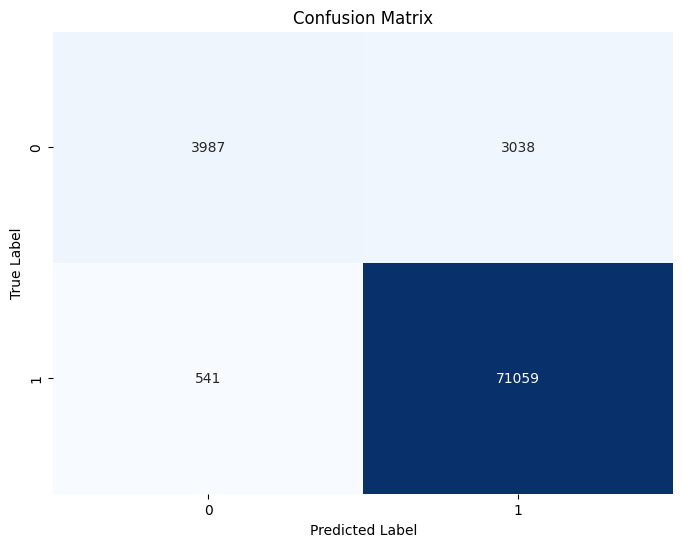

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Arriba se expuso la Matriz de Confusión, la cual es una herramienta que nos permite calcular el rendimiento del modelo de clasificación elegido que, en este caso, fue el de regresión logística. En resumen, nos ayuda a visualizar los aciertos y errores del modelo en cada clase.

In [ ]:
df.head()

,Id,Score,Summary,Text,Sentiment_label
0,1,5,Good Quality Dog Food,bought several vitality canned dog food produc...,1
1,2,1,Not as Advertised,product arrived labeled jumbo salted peanut ac...,0
2,3,4,"""Delight"" says it all","confection around centuries. light, pillowy ci...",1
3,4,2,Cough Medicine,looking secret ingredient robitussin believe f...,0
4,5,5,Great taffy,great taffy great price. wide assortment yummy...,1


A continuación, se presenta la Validación Cruzada, la cual nos indica el rendimiento promedio de la regresión logística en términos de precisión y la variabilidad en el rendimiento a través de los diferentes pliegues de validación.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print("Accuracy Promedio:", scores.mean())
print("Desviación Estándar:", scores.std())

Accuracy Promedio: 0.9546962365020324
Desviación Estándar: 0.0008214425649568944


Accuracy Promedio nos arrojó un 0.9546 lo que significa que, en promedio, el modelo predice correctamente cerca del 96% de los casos en el conjunto de datos de prueba (test). Este valor para la precisión es super alto.
Por otro lado, la desviación estándar nos dió 0.0008 el cual es un valor muy bajo y nos indica que el modelo es consistente en las predicciones.

In [ ]:
def compare_score_sentiment(row):
  if row['Score'] >= 4 and row['Sentiment_label'] == 1:
    return 'Correcto'
  elif row['Score'] >= 4 and row['Sentiment_label'] == 0:
    return 'Incorrecto'
  elif row['Score'] <= 3 and row['Sentiment_label'] == 0:
    return 'Correcto'
  elif row['Score'] <= 3 and row['Sentiment_label'] == 1:
    return 'Incorrecto'
  else:
    return 'Indeterminado'

df['Comparacion'] = df.apply(compare_score_sentiment, axis=1)


Finalmente, se agregó una columna al dataset donde se compara el “Score” y el “Sentiment label” de un dato:

1.   Score >= 4 y Sentiment label= 1, entonces la comparación es correcta.
2.  Score >= 4 y Sentiment label = 0, entonces la comparación es incorrecta, es decir, hay incongruencia.
3. Score <= 3 y Sentiment label = 0, entonces la comparación es correcta.
4. Score <= 3 y Sentiment label = 1, entonces la comparación es incorrecta, es decir, hay incongruencia.



In [ ]:
df.head(50)

,Id,Score,Summary,Text,Sentiment_label,Comparacion
0,1,5,Good Quality Dog Food,bought several vitality canned dog food produc...,1,Correcto
1,2,1,Not as Advertised,product arrived labeled jumbo salted peanut ac...,0,Correcto
2,3,4,"""Delight"" says it all","confection around centuries. light, pillowy ci...",1,Correcto
3,4,2,Cough Medicine,looking secret ingredient robitussin believe f...,0,Correcto
4,5,5,Great taffy,great taffy great price. wide assortment yummy...,1,Correcto
5,6,4,Nice Taffy,got wild hair taffy ordered five pound bag. ta...,1,Correcto
6,7,5,Great! Just as good as the expensive brands!,saltwater taffy great flavor soft chewy. candy...,1,Correcto
7,8,5,"Wonderful, tasty taffy",taffy good. soft chewy. flavor amazing. would ...,1,Correcto
8,9,5,Yay Barley,right i'm mostly sprouting cat eat grass. love...,1,Correcto
9,10,5,Healthy Dog Food,healthy dog food. good digestion. also good sm...,1,Correcto


In [ ]:
from google.colab import files
df.to_csv('df.csv', encoding = 'utf-8-sig')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>